<a href="https://colab.research.google.com/github/memeanji/python-bootcamp/blob/main/02_03)_plotly_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **plotly 이해하기**


---



**`plotly`**는 인터랙티브한 그래프를 그릴 수 있는 라이브러리입니다.

인터랙티브한 그래프를 html로 저장하기 용이합니다.

## **[1] 기본 문법**
```
fig = px.그래프종류(data_frame=데이터, x=X축 컬럼, y=Y축 컬럼, color=범례 컬럼, title=제목,
                 labels=dict(X축 컬럼=X축 라벨, Y축 컬럼=Y축 라벨),
                 width=그래프 가로길이, height=그래프 세로길이, text_auto=True/False)
fig.show()
```



In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df_groupby = df.groupby('species')[['body_mass_g']].mean().reset_index()
df_groupby

,species,body_mass_g
0,Adelie,3700.662252
1,Chinstrap,3733.088235
2,Gentoo,5076.016260


<Axes: xlabel='species', ylabel='body_mass_g'>

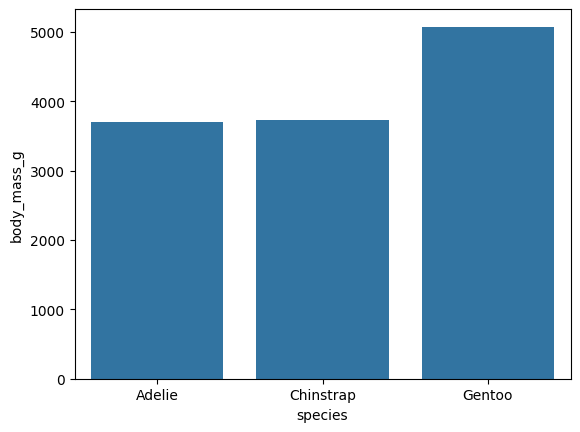

In [4]:
sns.barplot(data=df_groupby, x='species', y='body_mass_g')

In [5]:
fig = px.bar(df_groupby, x='species', y='body_mass_g')
fig.show()

In [6]:
df_groupby1 = df.groupby(['island','sex'])[['body_mass_g']].mean().reset_index()
df_groupby1

,island,sex,body_mass_g
0,Biscoe,Female,4319.375000
1,Biscoe,Male,5104.518072
2,Dream,Female,3446.311475
3,Dream,Male,3987.096774
4,Torgersen,Female,3395.833333
5,Torgersen,Male,4034.782609


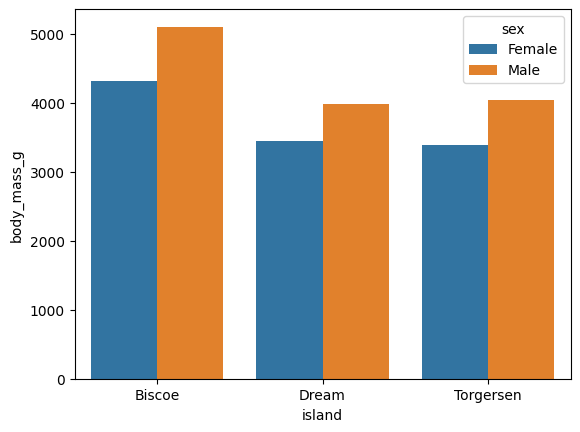

In [7]:
sns.barplot(data=df_groupby1, x="island", y="body_mass_g", hue="sex")
plt.show()

In [8]:
fig = px.bar(data_frame=df_groupby1, x='island', y='body_mass_g', color='sex')
fig.show()
#누적으로 쌓여서 그려진걸 확인할 수 있고
#plotly는 interactive하게 데이터에 마우스르 가져다주면 확인가능한게 장점

In [9]:
fig = px.bar(data_frame=df_groupby1, x='island', y='body_mass_g', color='sex',
             barmode='group', text_auto='.0d', width=700, height=500,
             title='island별 몸무게 평균', labels=dict(body_mass_g='몸무게(g)',
                                                 island='', sex='성별'))
fig.show()

#누적그래프로 그리지말고 옆으로 그리는 방법
#그래프의 크기도 작아지고
#제목도 생기고
#데이터라벨도 생김
#간단하게 그릴 수 있는게 장점임
#범례의 라벨도 따로고
#plotly는 한글도 따로 다운하지 않아도 됨

## **[2] 스타일 설정하기**


```
template=템플릿명
color_discrete_sequence = 컬러맵명 #범주형 데이터
color_continuous_scale= 컬러맵명 #연속형 데이터
```



- 템플릿 적용

In [10]:
for temp in ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark']:
    fig = px.bar(data_frame=df_groupby1, x='island', y='body_mass_g', color='sex', barmode='group', text_auto='.0d', width=700, height=500, title=f'템플릿: {temp}', labels=dict(body_mass_g='몸무게(g)', island='', sex='성별'), template=temp)
    fig.show()

- 컬러맵 적용

In [11]:
fig = px.colors.sequential.swatches_continuous()
fig.show()

In [12]:
fig = px.colors.qualitative.swatches()
fig.show()

In [14]:
for color_map in [px.colors.qualitative.Pastel1, px.colors.qualitative.Safe, px.colors.qualitative.Antique]:
    fig = px.bar(data_frame=df_groupby1, x='sex', y='body_mass_g', color='island', barmode='group', text_auto='.0d', width=700, height=500, color_discrete_sequence=color_map)
    fig.show()

In [16]:
for color_map in [px.colors.sequential.Burg, px.colors.sequential.Mint, px.colors.sequential.PuBuGn]:
    fig = px.scatter(data_frame=df, x='bill_length_mm', y='bill_depth_mm', color='flipper_length_mm', width=700, height=500, color_continuous_scale=color_map, template='simple_white')
    fig.show()

## **[3] HTML 파일로 저장하기**


```
fig.write_html(파일경로 및 파일명)
```



In [17]:
fig = px.scatter(data_frame=df, x='bill_length_mm', y='bill_depth_mm', color='flipper_length_mm', width=700, height=500, color_continuous_scale=px.colors.sequential.PuBuGn, template='plotly_white')
fig.show()
fig.write_html('test.html')